In [7]:
%matplotlib inline
import torch
from ffebm.rws_testing import load_modules, test_mnistpatch_one_batch, visual_samples_vae, test_mnist_one_batch

CUDA = torch.cuda.is_available()
if CUDA:
    DEVICE = torch.device('cuda:1')
print('torch:', torch.__version__, 'CUDA:', CUDA)
pixel_dim = 9
latent_dim = 32
hidden_dim = latent_dim * pixel_dim

LOAD_VERSION = 'mnistpatch-rws-%.2Elr-%.2Elatentdim' % (1e-4, latent_dim)
enc, dec = load_modules(pixel_dim, hidden_dim, latent_dim, LOAD_VERSION, CUDA, DEVICE)

torch: 1.3.0 CUDA: True
Initialize encoder and decoder and optimizer...
Load trained weights...


each row shows different samples of one MNIST image, where the true data image is at the rightmost columen 


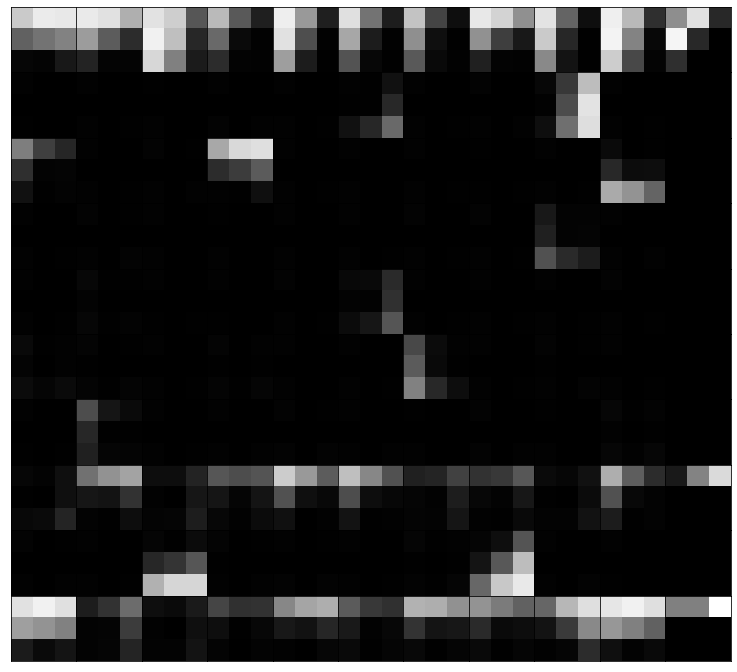

In [5]:
patch_size = 3
test_batch_size = 10
test_sample_size = 10
data_dir = '/home/hao/Research/sebm_data/'
images, recon = test_mnistpatch_one_batch(enc, dec, patch_size, test_batch_size, test_sample_size, data_dir, CUDA, DEVICE)
visual_samples_vae(images, recon)

In [9]:
from ffebm.data import load_mnist
_, test_data = load_mnist(data_dir, test_batch_size)
for (images, _) in test_data:
    break

In [17]:
import numpy as np
a = np.load('/home/hao/Research/train-images-idx3-ubyte', allow_pickle=True)

OSError: Failed to interpret file '/home/hao/Research/train-images-idx3-ubyte' as a pickle

In [3]:
# from ffebm.patches import vis_patches_one_image
# mnist_data_dir = '../../../sebm_data/'
# vis_patches_one_image(patch_size, mnist_data_dir)